<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_06_Convolutional_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Networks

1. Write down the input/output shapes of the following networks. Calculate the total number of parameters in the networks.
    - Network 1:
        - Input (8x8x3 image)
        - Convolutional Layer (12 filters (3x3), padding=valid)
        - Convolutional Layer (6 filters (3x3), padding=same)
        - Pooling Layer (2x2)
    - Network 2:
        - Input (32x32x3 image)
        - Convolutional Layer (20 filters (5x5), padding=valid)
        - Pooling Layer (2x2)
        - Convolutional Layer (10 filters (3x3), padding=valid)
        - Pooling Layer (2x2)
        - Flatten
        - Dense Layer (10)
2. Create a convolutional layer for MNIST digit classification, for example by modifying the example below. Try several networks and select the best one. Plot the learning curves for training/validation data. Compare the convolutional network to the dense network you created in a previous lab, considering the number of parameters, training time, classification results, etc.

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,810 (89.10 KB)

 Trainable params: 22,810 (89.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=3)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9301 - loss: 0.2262 - val_accuracy: 0.9812 - val_loss: 0.0671
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9838 - loss: 0.0514 - val_accuracy: 0.9802 - val_loss: 0.0708
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9880 - loss: 0.0375 - val_accuracy: 0.9862 - val_loss: 0.0536


In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),

    # Conv block 1
    tf.keras.layers.Conv2D(filters=20, kernel_size=(5, 5), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Conv block 2
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten + classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 20)     │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 10)     │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         3,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,940 (27.11 KB)

 Trainable params: 6,940 (27.11 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load MNIST
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1
)

# Normalize
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test  = X_test  / 255.

# Add channel dimension
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test  = X_test[..., np.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
#Sieć gęsta (baseline)

dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

dense.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist_dense = dense.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8763 - loss: 0.4468 - val_accuracy: 0.9538 - val_loss: 0.1594
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9643 - loss: 0.1240 - val_accuracy: 0.9627 - val_loss: 0.1244
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9765 - loss: 0.0801 - val_accuracy: 0.9687 - val_loss: 0.1065
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0605 - val_accuracy: 0.9705 - val_loss: 0.0988
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9688 - val_loss: 0.1076


In [3]:
# CNN
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

hist_cnn = cnn.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8838 - loss: 0.3787 - val_accuracy: 0.9767 - val_loss: 0.0741
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0580 - val_accuracy: 0.9790 - val_loss: 0.0662
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9875 - loss: 0.0406 - val_accuracy: 0.9832 - val_loss: 0.0559
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9858 - val_loss: 0.0521
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9868 - val_loss: 0.0517


In [9]:
# CNN
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

hist_cnn = cnn.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid)
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8806 - loss: 0.3804 - val_accuracy: 0.9825 - val_loss: 0.0639
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0494 - val_accuracy: 0.9852 - val_loss: 0.0522
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.9838 - val_loss: 0.0557
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9877 - val_loss: 0.0454
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9936 - loss: 0.0207 - val_accuracy: 0.9863 - val_loss: 0.0526


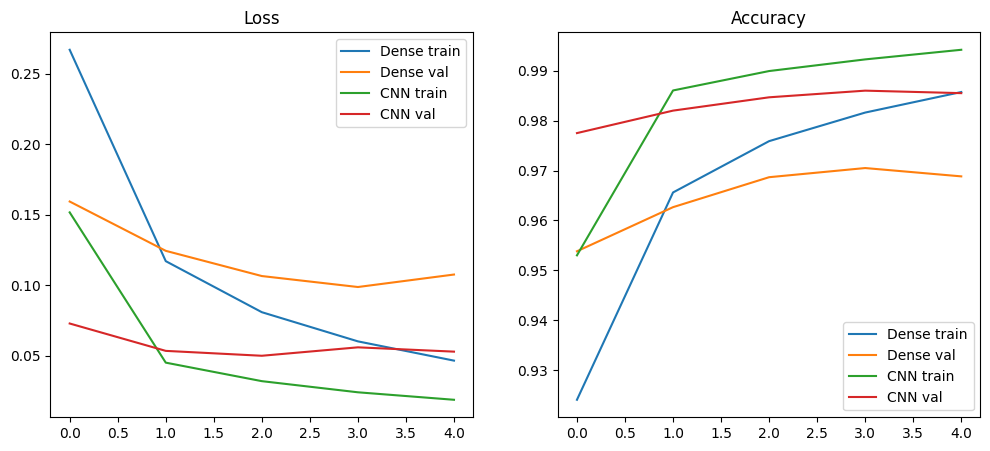

In [7]:
#Wykresy
plt.figure(figsize=(12,5))

# LOSS
plt.subplot(1,2,1)
plt.plot(hist_dense.history["loss"], label="Dense train")
plt.plot(hist_dense.history["val_loss"], label="Dense val")
plt.plot(hist_cnn.history["loss"], label="CNN train")
plt.plot(hist_cnn.history["val_loss"], label="CNN val")
plt.title("Loss")
plt.legend()

# ACC
plt.subplot(1,2,2)
plt.plot(hist_dense.history["accuracy"], label="Dense train")
plt.plot(hist_dense.history["val_accuracy"], label="Dense val")
plt.plot(hist_cnn.history["accuracy"], label="CNN train")
plt.plot(hist_cnn.history["val_accuracy"], label="CNN val")
plt.title("Accuracy")
plt.legend()

plt.show()

In [8]:
# Ocena
print("Dense test:", dense.evaluate(X_test, y_test, verbose=0))
print("CNN test:", cnn.evaluate(X_test, y_test, verbose=0))

Dense test: [0.08730359375476837, 0.973800003528595]
CNN test: [0.035153280943632126, 0.9898999929428101]
